In [4]:
import glob
from os import path as path
import numpy as np
import importlib
import wrftools as wrf
from matplotlib import pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.edgecolor'] = 'white'

In [11]:
importlib.reload(wrf)
force=False
# var='P'
z=2

def plot_p_az(d,dy,hr,v):
    fname='wrfout_d0' + d + '_2007-09-'+dy+'_'+hr+':00:00'
    hgt=wrf.getHeightCoord('../run/' + rname +'/' +fname)
#     print('z=',str(hgt[z-1]))
    r2=wrf.getRcoord('../run/' + rname +'/' +fname)
    v2=wrf.getWRF(rname,fname,v,z=z,type='az',force=force)
#     print(v.shape)
    plt.plot(r2,v2)
    
def plot_p_raw(d,dy,hr,v):
    fname='wrfout_d0' + d + '_2007-09-'+dy+'_'+hr+':00:00'
    hgt=wrf.getHeightCoord('../run/' + rname +'/' +fname)
#     print('z=',str(hgt[z-1]))
    x,y=wrf.getCoords('../run/' + rname +'/' +fname)
    v=wrf.getWRF(rname,fname,v,z=z,type='raw',force=force)
#     print(v.shape)
    plt.pcolormesh(x/1000,y/1000,v)
    plt.colorbar()

Creating: run_CTRL_10m/wrfout_d01_2007-09-01_00:00:00.P.az.npy
Creating: run_CTRL_10m/wrfout_d01_2007-09-01_00:00:00.P.raw.npy
Creating: run_CTRL_10m/wrfout_d02_2007-09-01_00:00:00.P.az.npy
Creating: run_CTRL_10m/wrfout_d02_2007-09-01_00:00:00.P.raw.npy
Creating: run_CTRL_10m/wrfout_d01_2007-09-01_01:00:00.P.az.npy
Creating: run_CTRL_10m/wrfout_d01_2007-09-01_01:00:00.P.raw.npy
Creating: run_CTRL_10m/wrfout_d02_2007-09-01_01:00:00.P.az.npy
Creating: run_CTRL_10m/wrfout_d02_2007-09-01_01:00:00.P.raw.npy
Creating: run_CTRL_10m/wrfout_d03_2007-09-01_01:00:00.P.az.npy
Creating: run_CTRL_10m/wrfout_d03_2007-09-01_01:00:00.P.raw.npy
Creating: run_CTRL_10m/wrfout_d01_2007-09-01_00:00:00.H.az.npy
Creating: run_CTRL_10m/wrfout_d01_2007-09-01_00:00:00.H.raw.npy
Creating: run_CTRL_10m/wrfout_d02_2007-09-01_00:00:00.H.az.npy
Creating: run_CTRL_10m/wrfout_d02_2007-09-01_00:00:00.H.raw.npy
Creating: run_CTRL_10m/wrfout_d03_2007-09-01_00:00:00.H.az.npy
Creating: run_CTRL_10m/wrfout_d03_2007-09-01_00:

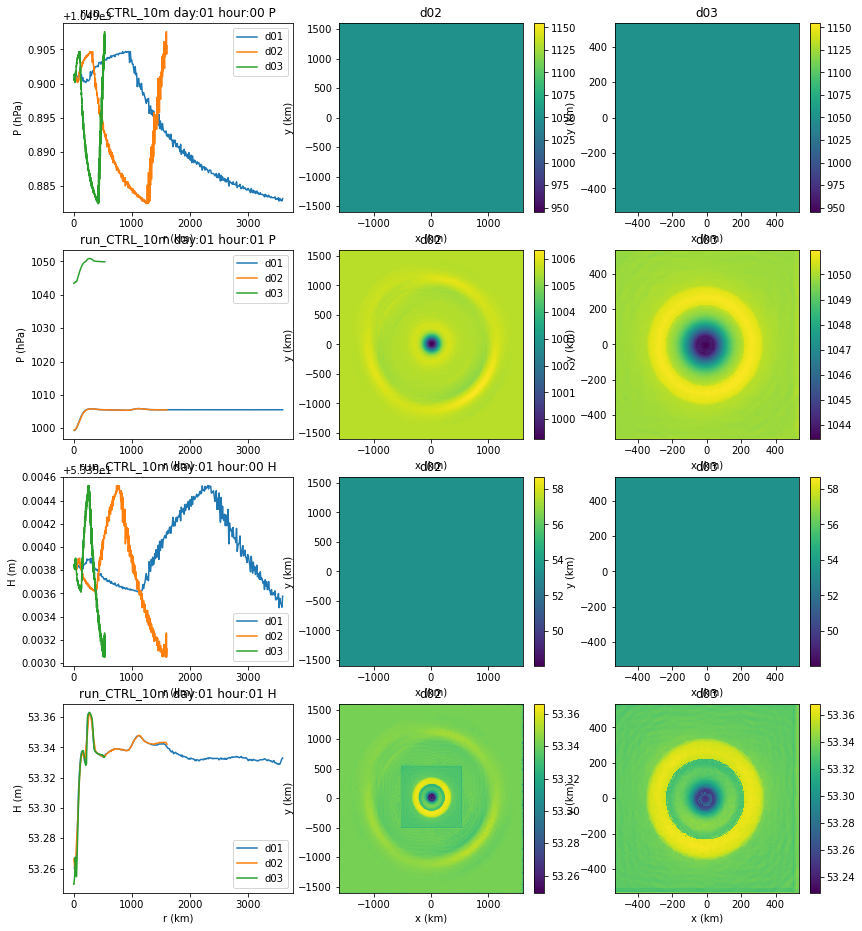

In [20]:
# rname='run_land_SW'
rname='run_CTRL_10m'
dy='01'
hr1='00'
hr2='01'
# hr='08'
vs=['P','P','H','H']
hrs=[hr1,hr2,hr1,hr2]
ystr=['P (hPa)','P (hPa)','H (m)','H (m)']

fig,axs=plt.subplots(4,3,figsize=(14,16))
for i in [0,1,2,3]:
    hr=hrs[i]
    v=vs[i]
    plt.sca(axs[i,0])
    plot_p_az('1',dy,hr,v)
    plot_p_az('2',dy,hr,v)
    plot_p_az('3',dy,hr,v)
    plt.xlabel('r (km)')
    plt.ylabel(ystr[i])
    plt.legend(['d01','d02','d03'])
    plt.title(rname + ' day:'+ dy+' hour:' +hr+' ' +v);

    plt.sca(axs[i,1])
    plot_p_raw('2',dy,hr,v)
    plt.title('d02')
    plt.xlabel('x (km)')
    plt.ylabel('y (km)')
    plt.sca(axs[i,2])
    plot_p_raw('3',dy,hr,v)
    plt.title('d03')
    plt.xlabel('x (km)')
    plt.ylabel('y (km)')

In [16]:
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)    
fig.savefig('P_fail_.png',bbox_inches='tight', pad_inches=0.1,transparent=False,dpi=200)